In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [9]:
from sklearn.datasets import fetch_olivetti_faces

In [10]:
a = fetch_olivetti_faces()

In [11]:
data, target = a.data, a.target

In [12]:
#СОЗДАЕМ ТРЕНИРОВОЧНЫЕ И ТЕСТОВЫЕ НАБОРЫ
train = data[target<30]
test = data[target>=30]
train.shape, test.shape


((300, 4096), (100, 4096))

In [13]:
#Выбераем 5 любых фото из 100 фото в наборе test
test_im = []
n_faces = 5
for i in range(n_faces):
    test_im.append(np.random.randint(test.shape[0]))
test_im


[14, 2, 52, 52, 5]

In [14]:
#НИЖЕРАСПОЛОЖЕННЫЙ КОД. СОЗДАЕТ ТЕСТОВЫЙ НАБОР КОТОРЫЙ СОДЕРЖИТ 5 РАНДОМНЫХ ФОТО 
test = test[test_im]

In [15]:
#СОЗДАЕМ МЕТКИ В ВИДЕ РАСПИЛЕННОГО ФОТО НА 2 ЧАСТИ ПО ГОРИЗОНТАЛИ. МЕТКА ЕСТЬ НИЖНЯЯ ЧАСТЬ ФОТО Т.Е:

x_test, y_test, x_train, y_train = test[:, :test.shape[1]//2], test[:, test.shape[1]//2:], train[:, :train.shape[1]//2], train[:, train.shape[1]//2:]
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((5, 2048), (300, 2048), (5, 2048), (300, 2048))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


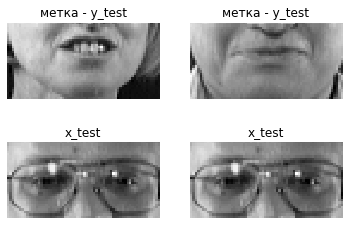

In [16]:
#ПРИМЕР МЕТОК:


for i in range(2):
    orig_im = np.hstack((x_test[i], y_test[i])).reshape(64,64)
    sub = plt.subplot(2,2,i+1, title = 'метка - y_test')
    sub.axis('off')
    sub.imshow(orig_im[32:,:], cmap = plt.cm.gray)
    for j in range(2):
        orig_pred = np.hstack((x_test[i], y_test[i])).reshape(64,64)
        sub = plt.subplot(2,2,i + 2 + j, title = 'x_test')
        sub.axis('off')
        sub.imshow(orig_pred[:32,:], cmap = plt.cm.gray)

In [17]:
#СОЗДАЕМ СЛОВАРЬ КОТОЫРЙ СОДЕРЖИТ НАЗВАНИЕ МОДЕЛИ И САМУ МОДЕЛЬ ДЛЯ ОБУЧЕНИЯ

ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    #"SVC": SVC(gamma = 0.01)
}


In [18]:
#ОБУЧАЕМ КАЖДУЮ МОДЕЛЬ И РЕЗУЛЬТАТЫ СОХРАНЯЕМ В СЛОВАРЬ y_pred
y_pred = dict()
for name, classifier in ESTIMATORS.items():
    classifier.fit(x_train, y_train)
    y_pred[name] = classifier.predict(x_test)


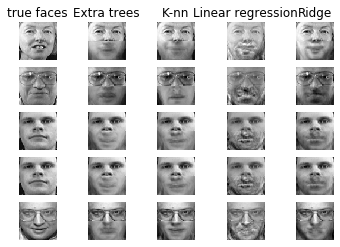

In [19]:
#ОТРИСОВКА РЕЗУЛЬТАТОВ.

for i in range(n_faces):
    orig_im = np.hstack((x_test[i], y_test[i]))    #СКЛЕИВАЕМ ОРИГИНАЛЫ ФОТО Т.Е ВЕРХНЮЮ И НИЖНЮЮ ЧАСТИ ЛИЦА 
    if i:
        sub = plt.subplot(n_faces, len(ESTIMATORS) + 1, i * n_faces + 1)   #СОЗДАЕМ ПЛОТЫ ДЛЯ ВЫНЕСЕНИЯ ВСЕ ФОТО НА ОДИН РИСУНОК
    else:
        sub = plt.subplot(n_faces, len(ESTIMATORS) + 1, i * n_faces + 1, title = 'true faces')
    plt.axis('off')    
    sub.imshow(orig_im.reshape(64,64), cmap = plt.cm.gray)  #ЗАПОЛНЯЕМ ПЛОТЫ ФОТОГРАФИЯМИ
    for j, est in enumerate(sorted(ESTIMATORS)):      
        est_im = np.hstack((x_test[i], y_pred[est][i]))     #СКЛЕИВАЕМ ВЕРХНЮЮ ЧАСТЬ ЛИЦА И НИЖНЮЮ ЧАСТЬ ЛИЦА КОТОРАЯ БЫЛА СПРОГНОЗИРОВАНА МОДЕЛЯМИ
        if i:
            sub = plt.subplot(n_faces, len(ESTIMATORS) + 1, i * n_faces + 2 + j)   #СОЗДАЕМ ПЛОТЫ 
        else:
            sub = plt.subplot(n_faces, len(ESTIMATORS) + 1, i * n_faces + 2 + j, title = est) 
        plt.axis('off')
        sub.imshow(est_im.reshape(64,64), cmap = plt.cm.gray)    #ЗАПОЛНЯЕМ ПЛОТЫ
plt.show()    
